# Import Libs

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Load Dataset

In [4]:
df = pd.read_csv("IMDB Dataset.csv")

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


# Preprocessing

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [9]:
df["sentiment"] = df["sentiment"].map({"positive":1,"negative":0})

In [10]:
df["review"]

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

# Text Cleaning

In [12]:
def clean_text(text):
    text = re.sub("[^\w\s]", " ", text)
    text = text.lower()
    text = text.split()
    words = [lemmatizer.lemmatize(word)for word in text if word  not in stop_words]
    return " ".join(words)
df["cleaned_review"] = df["review"].apply(clean_text)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Sajjad\AppData\Local\Temp\ipykernel_15844\4225570421.py:2: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub("[^\w\s]", " ", text)


In [13]:
df["cleaned_review"]

0        one reviewer mentioned watching 1 oz episode h...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: cleaned_review, Length: 50000, dtype: object

# Train Test

In [15]:
x = df["cleaned_review"]
y = df["sentiment"]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Convert text into Numbers

In [43]:
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfid = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Train Model

In [45]:
model = LogisticRegression(max_iter=300)
model.fit(x_train_tfid,y_train)

LogisticRegression(max_iter=300)

# Model Evaluation

In [49]:
predicted = model.predict(x_test_tfidf)

In [61]:
print("accuracy_score: \n",accuracy_score(predicted,y_test))

accuracy_score: 
 0.8878


In [59]:
print("\nClassification Report:\n", classification_report(y_test,predicted))



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [65]:
cm = confusion_matrix(y_test,predicted)

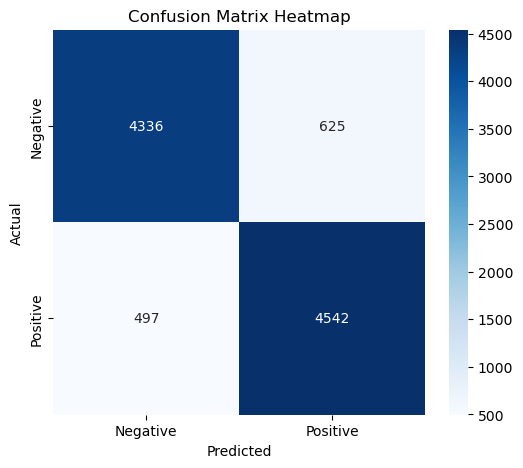

In [69]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


# Save Model

In [76]:
import pickle

# Make sure 'model' folder exists
import os
if not os.path.exists("model"):
    os.makedirs("model")

# Save trained Logistic Regression model
with open("model/sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open("model/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
